In [1]:
Sales prediction using ml
data -- big mart

output ---> Item outlet sales

continuos target variable  -- regression problem

SyntaxError: invalid syntax (3495348554.py, line 1)

In [450]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

In [451]:
df=pd.read_csv("train (3).csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [453]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [454]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [455]:
df.duplicated().sum()

0

In [456]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [457]:
# FILL MISSING VALUES IN 'Item_Weight' column

In [458]:
df['Item_Weight'].mean()

12.857645184135976

In [459]:
df['Item_weight_mean']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_mean
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_weight_mean           8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

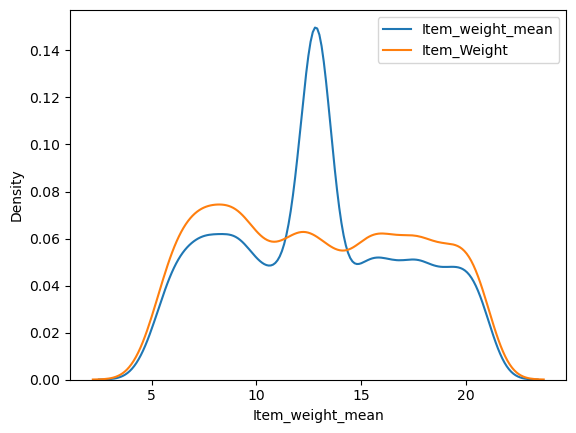

In [461]:
sns.kdeplot(data=df,x='Item_weight_mean',label='Item_weight_mean')
sns.kdeplot(data=df,x='Item_Weight',label='Item_Weight')
plt.legend()

In [462]:
df['Item_Weight_interpolate']=df['Item_Weight'].interpolate(method='linear')
#interpolation means estimating the missing values in between .

<Axes: ylabel='Density'>

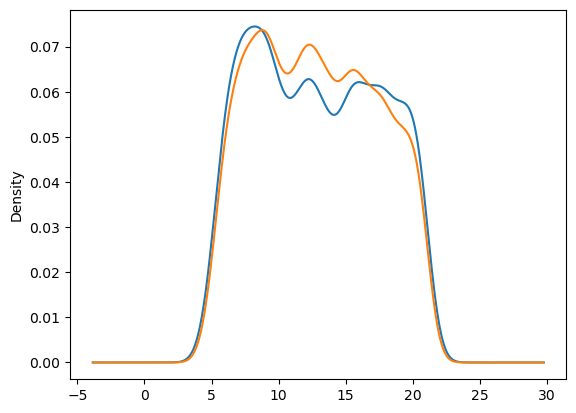

In [463]:
df['Item_Weight'].plot(kind='kde',label='Original')
df['Item_Weight_interpolate'].plot(kind='kde',label='interpolate')

In [464]:
NOT GOOD GRAPH   -- BOTH ARE COLLIDING

SyntaxError: invalid syntax (2657089503.py, line 1)

In [ ]:
df['Item_Weight_interpolate']=df['Item_Weight'].interpolate(method='linear')
#interpolation means estimating the missing values in between .

In [ ]:
df['Item_Weight'].plot(kind='kde',label='Original')
df['Item_Weight_interpolate'].plot(kind='kde',label='interpolate')

In [ ]:
# FILL MISSING VALUES IN 'Outlet_Size' column

In [465]:
most_frequent=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [466]:
most_frequent

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [467]:
missing=df['Outlet_Size'].isnull()

In [468]:
missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [469]:
df.loc[missing,'Outlet_Size']=df.loc[missing,'Outlet_Type'].apply(lambda x:most_frequent[x])

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_weight_mean           8523 non-null   float64
 13  Item_Weight_interpolate    8523 non-null   float

In [471]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_mean,Item_Weight_interpolate
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,7.210


In [472]:
now data with no missing values

SyntaxError: invalid syntax (1551177229.py, line 1)

### EDA (exploratory data analysis)
understand the trend ,pattern, relationship between different columns

In [473]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_weight_mean',
       'Item_Weight_interpolate'],
      dtype='object')

In [474]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

<Axes: xlabel='Item_weight_mean', ylabel='Density'>

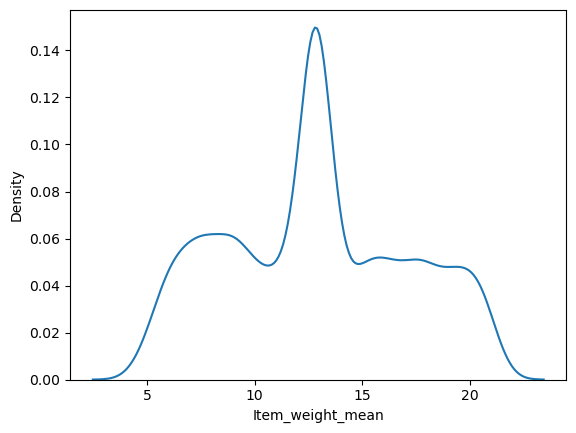

In [475]:
sns.kdeplot(x='Item_weight_mean',data=df)

<Axes: xlabel='Item_weight_mean', ylabel='Count'>

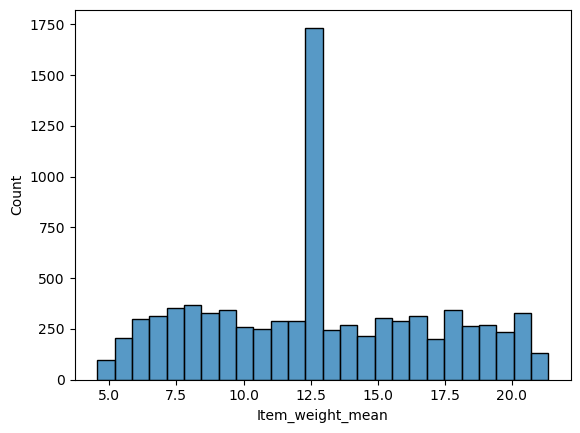

In [476]:
sns.histplot(x='Item_weight_mean',data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

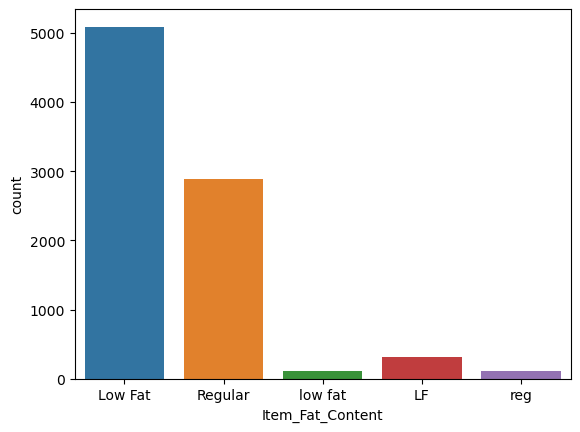

In [477]:
sns.countplot(x='Item_Fat_Content',data=df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

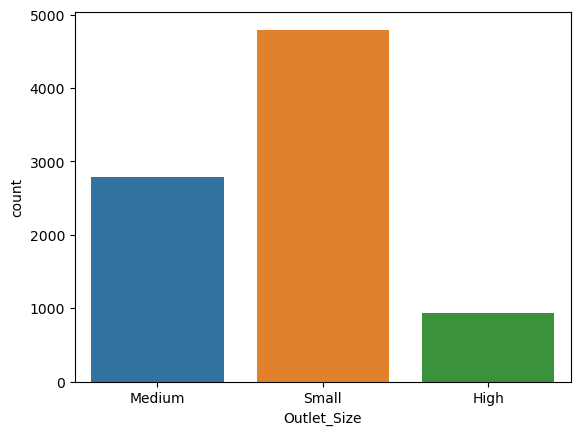

In [478]:
sns.countplot(x='Outlet_Size',data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

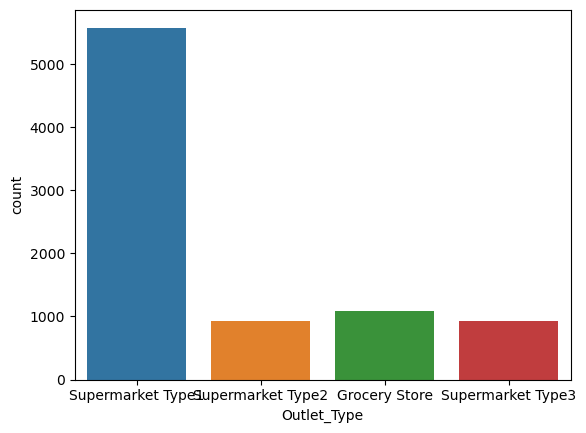

In [479]:
sns.countplot(x='Outlet_Type',data=df)

<Axes: xlabel='Outlet_Type'>

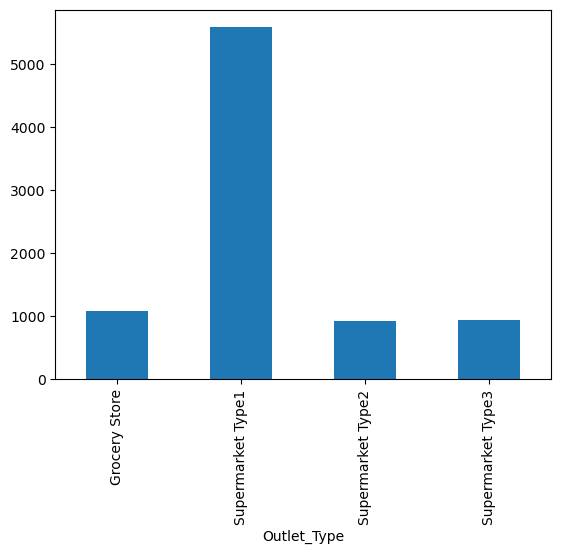

In [480]:
df.groupby('Outlet_Type')['Outlet_Type'].count().plot(kind='bar')

<Axes: xlabel='Item_Type', ylabel='count'>

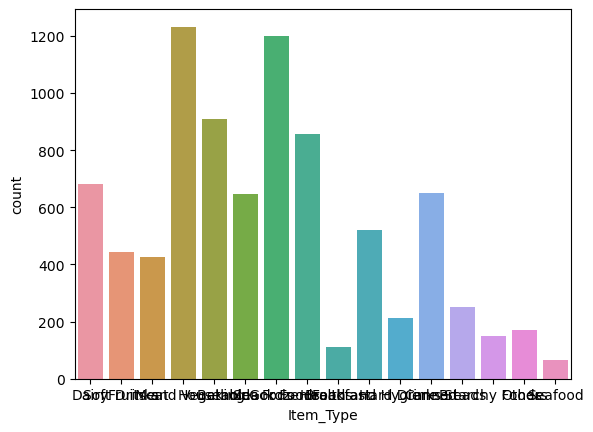

In [481]:
sns.countplot(x='Item_Type',data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

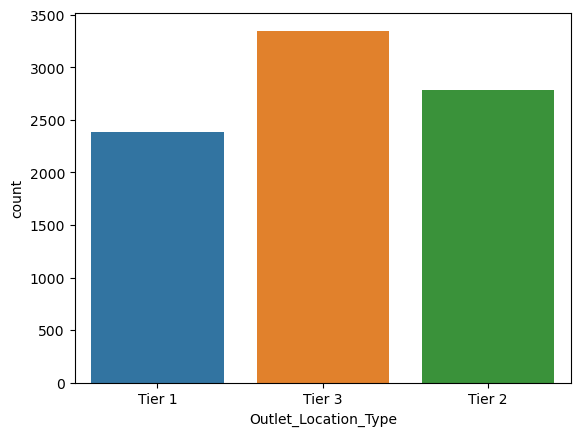

In [482]:
sns.countplot(x='Outlet_Location_Type',data=df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

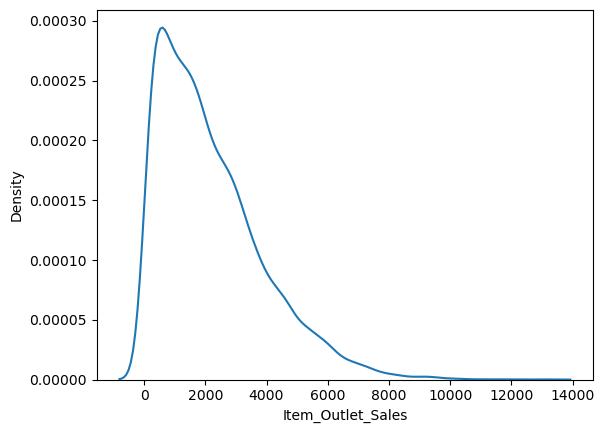

In [483]:
sns.kdeplot(x='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

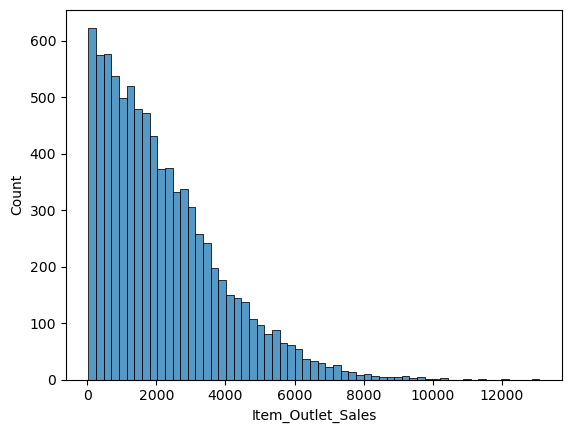

In [484]:
sns.histplot(x='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

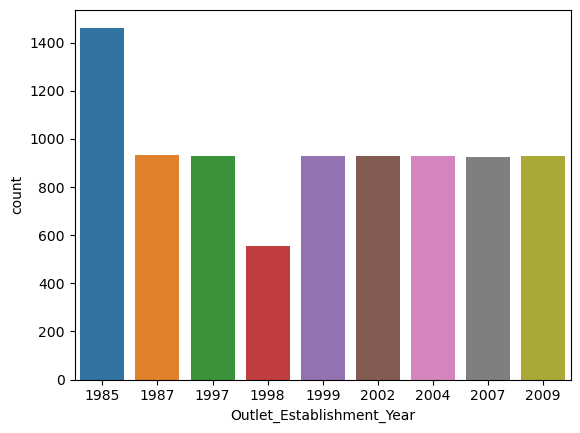

In [485]:
sns.countplot(x='Outlet_Establishment_Year',data=df)

<Axes: xlabel='Item_Type'>

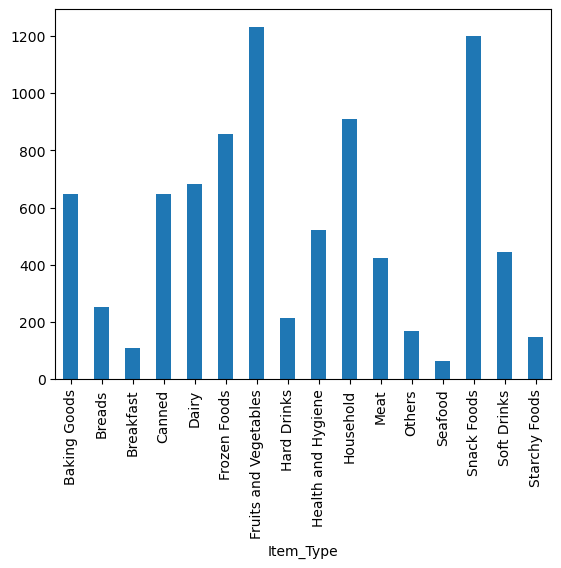

In [486]:
df.groupby('Item_Type')['Item_Type'].count().plot(kind='bar')

<Axes: xlabel='Item_MRP', ylabel='Density'>

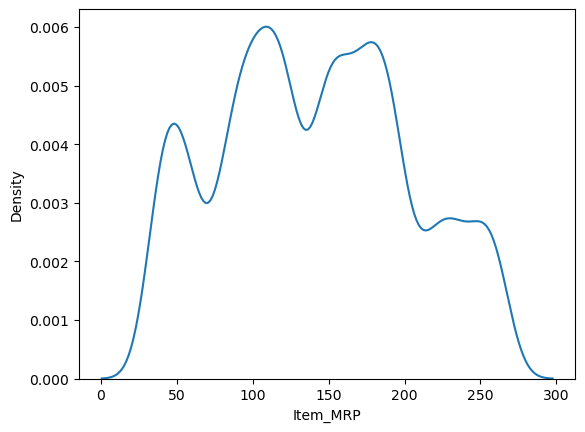

In [487]:
sns.kdeplot(x='Item_MRP',data=df)

<Axes: xlabel='Item_MRP', ylabel='Count'>

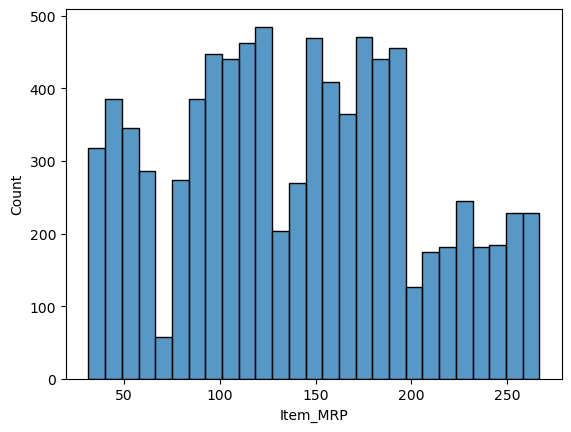

In [488]:
sns.histplot(x='Item_MRP',data=df)

<Axes: xlabel='Item_Weight'>

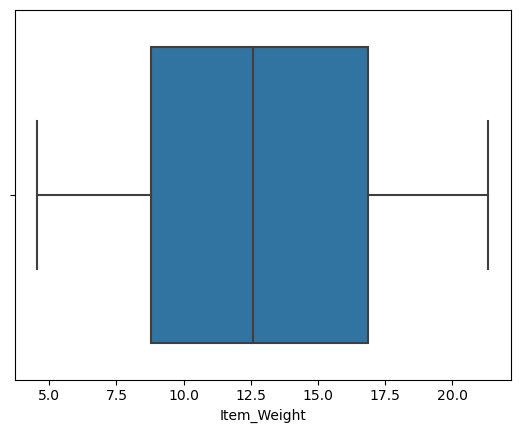

In [489]:
sns.boxplot(data=df,x='Item_Weight')

In [490]:
df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

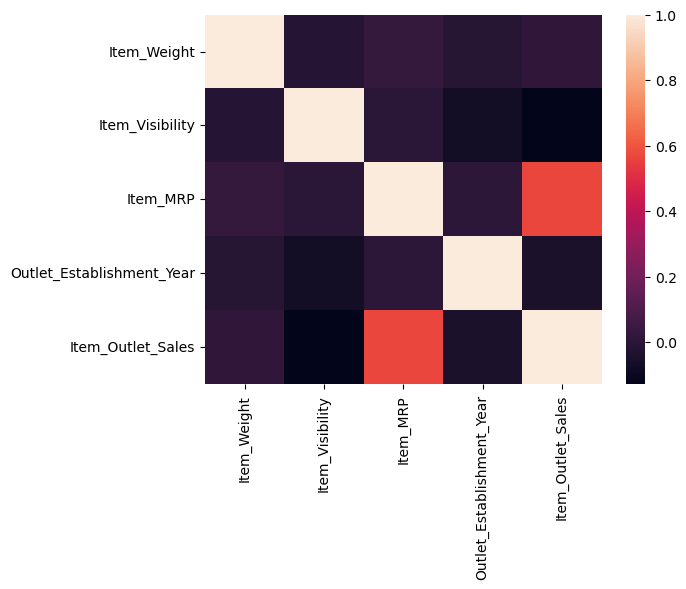

In [491]:
sns.heatmap(df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].corr())

### feature engineering

In [492]:
# 'Item_Visibility'

In [493]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [494]:
df['Item_Visibility'].replace({0:np.nan},inplace=True)

In [495]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [496]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.076975    3
0.162462    2
0.076841    2
0.073562    2
0.135708    2
           ..
0.013957    1
0.110460    1
0.124646    1
0.054142    1
0.044878    1
Name: count, Length: 7879, dtype: int64

In [497]:
df['Item_Visibility_mean']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())

In [498]:
df['Item_Visibility_mean']

0       0.016047
1       0.019278
2       0.016760
3       0.070482
4       0.070482
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility_mean, Length: 8523, dtype: float64

<Axes: xlabel='Item_Visibility', ylabel='Density'>

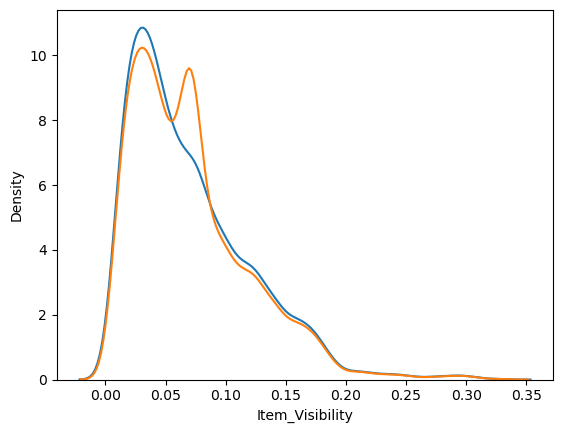

In [499]:
sns.kdeplot(data=df,x='Item_Visibility')
sns.kdeplot(data=df,x='Item_Visibility_mean')

In [500]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].interpolate(method='linear')
#interpolation means estimating the missing values in between .

<Axes: ylabel='Density'>

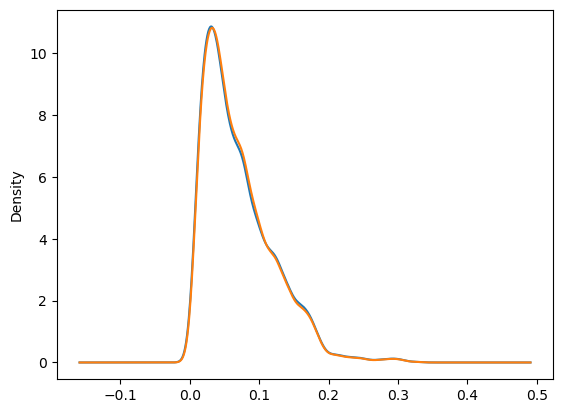

In [501]:
df['Item_Visibility'].plot(kind='kde',label='Original')
df['Item_Visibility_interpolate'].plot(kind='kde',label='interpolate')

In [502]:
print(df['Item_Visibility_mean'].skew())
df['Item_Visibility_interpolate'].skew()

1.271273175053104


1.2370212104832365

In [503]:
# 'Item_Identifier'

In [504]:
df['Item_Identifier'].value_counts().sample(5)

Item_Identifier
NCB54    4
FDT57    6
FDY44    5
FDS10    4
FDV12    4
Name: count, dtype: int64

In [505]:
drinks
food 
non consumable

SyntaxError: invalid syntax (383732233.py, line 3)

In [506]:
df['Item_Identifier']=df['Item_Identifier'].str[0:2]

In [507]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [508]:
''

''

In [509]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [510]:
def gh(x):
    if x in ['Low Fat','low fat','LF']:
        return 'low Fat'
    else:
        return 'Regular'
        

In [511]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(gh)
df['Item_Fat_Content']

0       low Fat
1       Regular
2       low Fat
3       Regular
4       low Fat
         ...   
8518    low Fat
8519    Regular
8520    low Fat
8521    Regular
8522    low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [512]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
low Fat    5517
Regular    3006
Name: count, dtype: int64

In [513]:
Outlet_Establishment_Year

NameError: name 'Outlet_Establishment_Year' is not defined

In [514]:
import datetime as dt

In [515]:
x=dt.datetime.today().year
x

2024

In [516]:
df['Outlet_Establishment_Year']=x-df['Outlet_Establishment_Year']

In [517]:
df['Outlet_Establishment_Year']


0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [518]:
# remove previous columns and include new columns
df.drop(columns=['Item_Weight','Item_Visibility','Item_weight_mean','Item_Visibility_mean'],inplace=True)

In [519]:
df1=df.copy()

In [520]:
df1

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FD,low Fat,Dairy,249.8092,OUT049,25,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047
1,DR,Regular,Soft Drinks,48.2692,OUT018,15,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278
2,FD,low Fat,Meat,141.6180,OUT049,25,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,26,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755
4,NC,low Fat,Household,53.8614,OUT013,37,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,low Fat,Snack Foods,214.5218,OUT013,37,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783
8519,FD,Regular,Baking Goods,108.1570,OUT045,22,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982
8520,NC,low Fat,Health and Hygiene,85.1224,OUT035,20,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186
8521,FD,Regular,Snack Foods,103.1332,OUT018,15,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221


In [521]:
from sklearn.preprocessing import LabelEncoder
df1=df.copy()

In [522]:
col=df.select_dtypes(include=['object']).columns
for i in col:
    gd=LabelEncoder()
    df1[i]=gd.fit_transform(df1[i])
print(df1)

      Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  \
0                   1                 1          4  249.8092   
1                   0                 0         14   48.2692   
2                   1                 1         10  141.6180   
3                   1                 0          6  182.0950   
4                   2                 1          9   53.8614   
...               ...               ...        ...       ...   
8518                1                 1         13  214.5218   
8519                1                 0          0  108.1570   
8520                2                 1          8   85.1224   
8521                1                 0         13  103.1332   
8522                0                 1         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                     9                         25            1   
1                     3                         15            1   
2                     9       

##### WHICH MODEL TO TAKE FOR MODEL BUILDING 

In [531]:
x=df1.drop(columns="Item_Outlet_Sales")

In [532]:
x

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_interpolate
0,1,1,4,249.8092,9,25,1,0,1,9.300,0.016047
1,0,0,14,48.2692,3,15,1,2,2,5.920,0.019278
2,1,1,10,141.6180,9,25,1,0,1,17.500,0.016760
3,1,0,6,182.0950,0,26,2,2,0,19.200,0.015755
4,2,1,9,53.8614,1,37,0,2,1,8.930,0.014751
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,1,13,214.5218,1,37,0,2,1,6.865,0.056783
8519,1,0,0,108.1570,7,22,2,1,1,8.380,0.046982
8520,2,1,8,85.1224,6,20,2,1,1,10.600,0.035186
8521,1,0,13,103.1332,3,15,1,2,2,7.210,0.145221


In [533]:
y=df["Item_Outlet_Sales"]

In [534]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [535]:
xg gradient boosting random forest regressor

SyntaxError: invalid syntax (3584634861.py, line 1)

In [536]:
from sklearn.ensemble import RandomForestRegressor

In [537]:
from sklearn.model_selection import cross_val_score

In [538]:
rg=RandomForestRegressor(n_estimators=100,random_state=7)

In [539]:
np.mean(cross_val_score(rg,x,y,scoring='r2'))

0.5503096509898145

In [540]:
from xgboost import XGBRFRegressor

In [541]:
xg=XGBRFRegressor(n_estimators=100,random_state=42)

In [542]:
np.mean(cross_val_score(xg,x,y,scoring='r2'))

0.5955344383709689

###### to work on gradient boosting random forest regressor

###### column importance [XGBRFRegressor]

In [543]:
xg=XGBRFRegressor(n_estimators=100,random_state=7)

In [544]:
xg01=xg.fit(x,y)
pd.DataFrame({'feature':x.columns,'XGBRF_importance':xg01.feature_importances_})

,feature,XGBRF_importance
0,Item_Identifier,0.000873
1,Item_Fat_Content,0.000616
2,Item_Type,0.001622
3,Item_MRP,0.123390
4,Outlet_Identifier,0.098929
5,Outlet_Establishment_Year,0.126398
6,Outlet_Size,0.052289
7,Outlet_Location_Type,0.011209
8,Outlet_Type,0.580602
9,Item_Weight_interpolate,0.001671


In [545]:
# sort 
xg01=xg.fit(x,y)
pd.DataFrame({'feature':x.columns,'XGBRF_importance':xg01.feature_importances_}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
8,Outlet_Type,0.580602
5,Outlet_Establishment_Year,0.126398
3,Item_MRP,0.123390
4,Outlet_Identifier,0.098929
6,Outlet_Size,0.052289
7,Outlet_Location_Type,0.011209
10,Item_Visibility_interpolate,0.002399
9,Item_Weight_interpolate,0.001671
2,Item_Type,0.001622
0,Item_Identifier,0.000873


In [ ]:
take top 5 columns

In [546]:
main_x=x[['Item_MRP','Outlet_Identifier',"Outlet_Establishment_Year","Outlet_Size","Outlet_Type"]]

In [547]:
main_x

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,249.8092,9,25,1,1
1,48.2692,3,15,1,2
2,141.6180,9,25,1,1
3,182.0950,0,26,2,0
4,53.8614,1,37,0,1
...,...,...,...,...,...
8518,214.5218,1,37,0,1
8519,108.1570,7,22,2,1
8520,85.1224,6,20,2,1
8521,103.1332,3,15,1,2


In [548]:
np.mean(cross_val_score(xg01,main_x,y,scoring='r2'))

0.5966112818132623

# final model building 


In [549]:
from sklearn.metrics import mean_absolute_error

In [550]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(main_x,y,test_size=0.2,random_state=0)

In [551]:
x_train

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
6404,123.5414,5,39,1,3
5820,52.0324,7,22,2,1
48,60.6220,8,27,2,1
4583,247.2776,4,39,2,0
3791,194.4478,6,20,2,1
...,...,...,...,...,...
4373,49.1034,0,26,2,0
7891,188.1872,5,39,1,3
4859,78.3960,6,20,2,1
3264,121.4072,7,22,2,1


In [552]:
fin=XGBRFRegressor()

In [553]:
fin.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

# prediction

In [558]:
y_pred=fin.predict(x_test)
y_pred

array([2634.9458 , 1839.9684 , 2090.4683 , ..., 4057.8933 ,  175.26169,
       5993.0376 ], dtype=float32)

In [559]:
mean_absolute_error(y_test,y_pred)

769.2416087628086

In [556]:
np.mean(cross_val_score(fin,main_x,y,scoring='r2'))

0.5964526425342893

In [560]:
outp=fin.predict([[123.5414,5,39,1,3]])
print(outp)
print(f"sales is between {outp-769.24} and{outp+769.24}")

[3168.867]
sales is between [2399.627] and[3938.107]


In [561]:
outp=fin.predict([[52.0324,7,22,2,1]])
print(outp)
print(f"sales is between {outp-769.24} and{outp+769.24}")

[868.97614]
sales is between [99.736145] and[1638.2161]
